In [4]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing the files
directory_path = '../language_translations'  # Replace with your directory path

# Dictionary to group data by probe

grouped_by_probe = {}
for filename in os.listdir(directory_path):
    # Split the filename into components
    components = filename.split('_')
    if len(components) >= 6:  # Ensure it matches the expected minimum pattern
        # print(components)
        print('filename', filename)
        model = '-'.join(components[:4])
        probe = components[4]
        if probe=='mean':
            probe='mean_difference'
            i=5
        else:
            i=4
        # print(probe)
            
        lang1 = components[i+1]
        lang2 = components[i+2]
        coef = float(components[i+3])
        
        # if lang2!='chinese':
        #     continue
        # if lang2!='spanish':
        #     continue
        # if coef!=6.0:
        #     continue

        # Load the file's data
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as f:
            ratings = f.readlines()[::2]
            try:
                ratings = [int(x[:1]) for x in ratings]
            except:
                ratings = [x[:4] for x in ratings]
                print(filename)
                print(ratings)
            # print(reviews)
    
        key = (model, probe, lang1, lang2)
        if key in grouped_by_probe:
            for i in range(len(ratings)):
                grouped_by_probe[key][i] = max(grouped_by_probe[key][i], ratings[i])
        else:
            grouped_by_probe[key] = ratings
            
        

# # Example: Print grouped data keys
# for probe, data_list in grouped_by_probe.items():
#     print(f"Probe: {probe}, Number of files: {len(data_list)}")


filename gemma_2_9b_it_linear_english_chinese_4.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_chinese_5.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_chinese_6.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_chinese_7.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_chinese_8.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_chinese_9.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_german_4.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_german_5.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_german_6.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_german_7.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_german_8.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_german_9.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_spanish_4.0_translation_ratings.txt
filename gemma_2_9b_it_linear_english_spanis

In [5]:
import numpy as np
import matplotlib.pyplot as plt

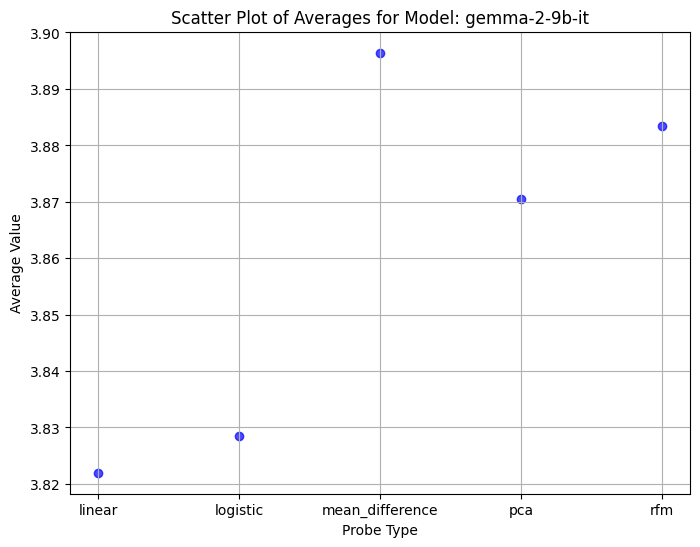

In [6]:
model = 'gemma-2-9b-it'
filtered_data = {key: values for key, values in grouped_by_probe.items() if key[0] == model}

# Prepare data for scatter plot
probes = {}
counts = {}

for (model_name, probe_type, lang1, lang2), values in filtered_data.items():
    # if lang1 != 'english' or lang2 != 'chinese':
    #     continue
            
    if probe_type not in probes:
        probes[probe_type] = 0.
        counts[probe_type] = 0.
    probes[probe_type] += np.sum(values)
    counts[probe_type] += len(values)
    
for probe_type in counts.keys():
    probes[probe_type] /= counts[probe_type]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(probes.keys(), probes.values(), color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Probe Type')
plt.ylabel('Average Value')
plt.title(f'Scatter Plot of Averages for Model: {model}')
plt.grid(True)

# Display the plot
plt.show()

In [7]:
import pandas as pd

# Input data as a list of key-value pairs

# Create a DataFrame from the key-value pairs
data = []
for keys, value in filtered_data.items():
    data.append({
        'model': keys[0],
        'method': keys[1],
        'language': keys[3],
        'value': np.mean(value),
        'std' : np.std(value)
    })

df = pd.DataFrame(data)

# Group by method and language, then calculate the average
grouped = df.groupby(['method', 'language'])['value'].mean().reset_index()

# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='value')

# Display the result
print(result)

# std
grouped = df.groupby(['method', 'language'])['std'].mean().reset_index()
# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='std')
# Display the result
print(result)

language          chinese    german   spanish
method                                       
linear           3.757282  3.893204  3.815534
logistic         3.650485  3.932039  3.902913
mean_difference  3.815534  3.941748  3.932039
pca              3.893204  3.864078  3.854369
rfm              3.796117  3.922330  3.932039
language          chinese    german   spanish
method                                       
linear           0.660480  0.460321  0.707073
logistic         0.733508  0.287680  0.355663
mean_difference  0.552972  0.272537  0.251679
pca              0.338834  0.483686  0.510240
rfm              0.580579  0.301753  0.287680


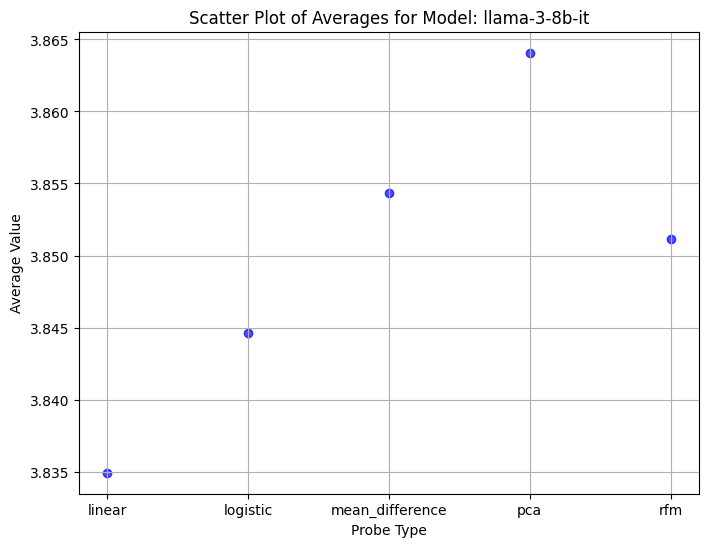

In [8]:
model = 'llama-3-8b-it'
filtered_data = {key: values for key, values in grouped_by_probe.items() if key[0] == model}

# Prepare data for scatter plot
probes = {}
counts = {}

for (model_name, probe_type, lang1, lang2), values in filtered_data.items():
    if probe_type not in probes:
        probes[probe_type] = 0.
        counts[probe_type] = 0.
    probes[probe_type] += np.sum(values)
    counts[probe_type] += len(values)
    
for probe_type in counts.keys():
    probes[probe_type] /= counts[probe_type]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(probes.keys(), probes.values(), color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Probe Type')
plt.ylabel('Average Value')
plt.title(f'Scatter Plot of Averages for Model: {model}')
plt.grid(True)

# Display the plot
plt.show()

In [9]:
import pandas as pd

# Input data as a list of key-value pairs

# Create a DataFrame from the key-value pairs
data = []
for keys, value in filtered_data.items():
    data.append({
        'model': keys[0],
        'method': keys[1],
        'language': keys[3],
        'value': np.mean(value),
        'std' : np.std(value)
    })

df = pd.DataFrame(data)

# Group by method and language, then calculate the average
grouped = df.groupby(['method', 'language'])['value'].mean().reset_index()

# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='value')

# Display the result
print(result)

# std
grouped = df.groupby(['method', 'language'])['std'].mean().reset_index()
# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='std')
# Display the result
print(result)

language          chinese    german   spanish
method                                       
linear           3.951456  3.747573  3.805825
logistic         3.922330  3.757282  3.854369
mean_difference  3.941748  3.757282  3.864078
pca              3.912621  3.786408  3.893204
rfm              3.922330  3.757282  3.873786
language          chinese    german   spanish
method                                       
linear           0.214912  0.569763  0.483881
logistic         0.301753  0.548006  0.449547
mean_difference  0.272537  0.529994  0.441721
pca              0.344352  0.568604  0.338834
rfm              0.332374  0.548006  0.386159
